In [1]:
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=0.73)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
import matplotlib.pyplot as plt
from glob import glob

In [2]:
lp_source = 'X'
lp_target = 'X'
directory = '.'

trials = set()
data = {}
for fn in sorted(glob('./%s/*%s-%s*.npz' % (directory, lp_source, lp_target))):
    basename = fn.split('/')[2]
    print(basename)
    
    fields = basename[:-4].split('_')
    trials.add(fields[0])
    data[(fields[0], int(fields[-1]))] = np.load(open(fn, 'rb'))

fixed_X-X_1200.npz
fixed_X-X_1800.npz
fixed_X-X_2400.npz
fixed_X-X_3000.npz
fixed_X-X_600.npz
interim-pfutility_0.5__X-X_1200.npz
interim-pfutility_0.5__X-X_1800.npz
interim-pfutility_0.5__X-X_2300.npz
interim-pfutility_0.5__X-X_2400.npz
interim-pfutility_0.5__X-X_3000.npz
interim-pfutility_0.5__X-X_600.npz
interim_pocock_X-X_1200.npz
interim_pocock_X-X_1800.npz
interim_pocock_X-X_2400.npz
interim_pocock_X-X_3000.npz
interim_pocock_X-X_600.npz


In [3]:
xs = list(range(200, 4201, 200))
trials = sorted(trials)

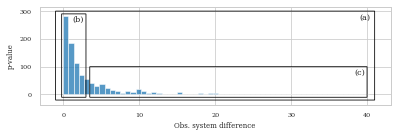

In [90]:
# histplot
plt.figure(figsize=(6.29, 1.8))
one_trial = next(iter(data.keys()))
trial_data = data[one_trial]

ax = plt.gca()
from matplotlib.patches import FancyBboxPatch
import matplotlib.transforms as mtransforms
bb = mtransforms.Bbox([[-0.2, -10], [3, 290]])
p_bbox = matplotlib.patches.FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=0.",
                            ec="k", fc="none", zorder=10.,
                            )
ax.add_patch(p_bbox)

bb = mtransforms.Bbox([[3.5, -10], [40, 100]])
p_bbox = matplotlib.patches.FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=0.",
                            ec="k", fc="none", zorder=10.,
                            )
ax.add_patch(p_bbox)

bb = mtransforms.Bbox([[-1, -20], [41, 300]])
p_bbox = matplotlib.patches.FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=0.",
                            ec="k", fc="none", zorder=10.,
                            )
ax.add_patch(p_bbox)

ax.text(39, 265, '(a)', va='bottom', ha='left', size=8)
ax.text(1.2, 255, '(b)', va='bottom', ha='left', size=8)
ax.text(38.3, 65, '(c)', va='bottom', ha='left', size=8)

g = sns.histplot(np.abs(trial_data[:,0]))
plt.xlabel('Distribution of campaign differences')
g.set(xlabel='Obs. system difference', ylabel='p-value')
plt.savefig('X-X_difference_dist.pdf', bbox_inches='tight')

In [5]:
def get_name(trial):
    if 'futility' in trial:
        return 'interim-futility'
    elif 'interim' in trial:
        return 'interim'
    else:
        return 'fixed'

Text(0, 0.5, 'Average power (# of significant pairs)')

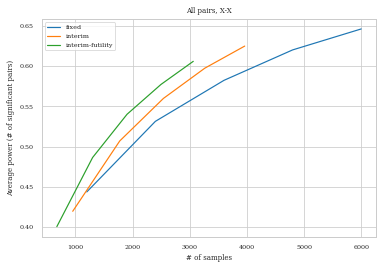

In [6]:
for trial in trials:
    name = get_name(trial)
    x, y = [], []
    for n in xs:
        try:
            trial_data = data[(trial, n)]
        except:
            continue
        x.append(trial_data.mean(axis=0)[2]*2)
        y.append(trial_data.mean(axis=0)[1])
    sns.lineplot(x=x, y=y, label=name)
    
plt.title('All pairs, %s-%s' % (lp_source, lp_target))
plt.xlabel('# of samples')
plt.ylabel('Average power (# of significant pairs)')

In [7]:
large_difference = 3
np.mean(np.abs(trial_data[:,0]) > large_difference)

0.321

Text(0, 0.5, 'Average power (# of significant pairs)')

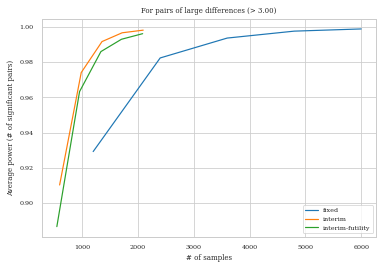

In [8]:
# large differences
for trial in trials:
    name = get_name(trial)
    x, y = [], []
    for n in xs:
        try:
            trial_data = data[(trial, n)]
        except:
            continue
            
        large_diff_mask = np.abs(trial_data[:,0]) > large_difference
        tdata = trial_data[large_diff_mask]
        
        x.append(tdata.mean(axis=0)[2]*2)
        y.append(tdata.mean(axis=0)[1])
    sns.lineplot(x=x, y=y, label=name)

plt.title('For pairs of large differences (> %.2f)' % (large_difference))
plt.xlabel('# of samples')
plt.ylabel('Average power (# of significant pairs)')

Text(0, 0.5, 'Average power (# of significant pairs)')

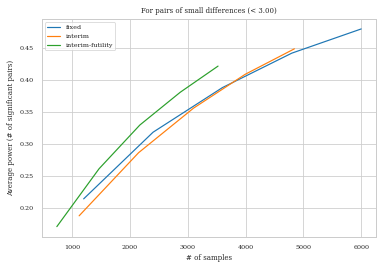

In [9]:
for trial in trials:
    name = get_name(trial)
    x, y = [], []
    for n in xs:
        try:
            trial_data = data[(trial, n)]
        except:
            continue
        
        large_diff_mask = np.abs(trial_data[:,0]) < large_difference
        tdata = trial_data[large_diff_mask]
        
        x.append(tdata.mean(axis=0)[2]*2)
        y.append(tdata.mean(axis=0)[1])
    sns.lineplot(x=x, y=y, label=name)

plt.title('For pairs of small differences (< %.2f)' % (large_difference))
plt.xlabel('# of samples')
plt.ylabel('Average power (# of significant pairs)')

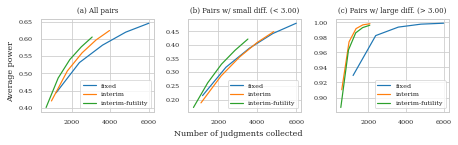

In [93]:
# combine all three graphs
fig, axs = plt.subplots(1, 3, figsize=(6.29,1.8), sharey=False)
fig.tight_layout()

for trial in trials:
    name = get_name(trial)
    x, y = [], []
    for n in xs:
        try:
            trial_data = data[(trial, n)]
        except:
            continue
        x.append(trial_data.mean(axis=0)[2]*2)
        y.append(trial_data.mean(axis=0)[1])
    sns.lineplot(ax=axs[0], x=x, y=y, label=name)
    
for trial in trials:
    name = get_name(trial)
    x, y = [], []
    for n in xs:
        try:
            trial_data = data[(trial, n)]
        except:
            continue
            
        large_diff_mask = np.abs(trial_data[:,0]) > large_difference
        tdata = trial_data[large_diff_mask]
        
        x.append(tdata.mean(axis=0)[2]*2)
        y.append(tdata.mean(axis=0)[1])
    sns.lineplot(ax=axs[2], x=x, y=y, label=name)
    
for trial in trials:
    name = get_name(trial)
    x, y = [], []
    for n in xs:
        try:
            trial_data = data[(trial, n)]
        except:
            continue
        
        large_diff_mask = np.abs(trial_data[:,0]) < large_difference
        tdata = trial_data[large_diff_mask]
        
        x.append(tdata.mean(axis=0)[2]*2)
        y.append(tdata.mean(axis=0)[1])
    sns.lineplot(ax=axs[1], x=x, y=y, label=name)

axs[0].set_title('(a) All pairs')
axs[2].set_title('(c) Pairs w/ large diff. (> %.2f)' % (large_difference))
axs[1].set_title('(b) Pairs w/ small diff. (< %.2f)' % (large_difference))
fig.text(0.5, -0.00, 'Number of judgments collected', ha='center', size=8)
fig.text(-0.01, 0.5, 'Average power', va='center', rotation='vertical', size=8)
plt.savefig('X-X_testing_results.pdf', bbox_inches='tight')

Text(0, 0.5, 'Average power (of large difference pairs)')

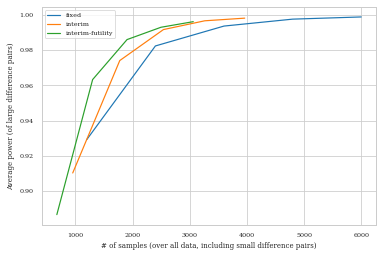

In [11]:
# large differences (taking into account all experimental cost)
for trial in trials:
    name = get_name(trial)
    x, y = [], []
    for n in xs:
        try:
            trial_data = data[(trial, n)]
        except:
            continue
            
        large_diff_mask = np.abs(trial_data[:,0]) > large_difference
        tdata = trial_data[large_diff_mask]
        
        x.append(trial_data.mean(axis=0)[2]*2)  # use all data
        y.append(tdata.mean(axis=0)[1])
    sns.lineplot(x=x, y=y, label=name)

# different kind of evaluation
# we are trying to detect meaning differences (> 1) as efficiently as possible.

# try 2 steps

# leave out pocock correction
# plt.title('For pairs of large differences (> %.2f)' % (large_difference))
plt.xlabel('# of samples (over all data, including small difference pairs)')
plt.ylabel('Average power (of large difference pairs)')

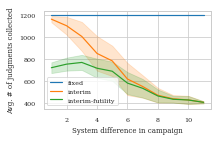

In [12]:
plt.figure(figsize=(3, 1.8))

n = 600
for trial in trials:
    name = get_name(trial)
    trial_data = data[(trial, n)]

    diffs = np.abs(trial_data[:,0])
    bins = np.linspace(0, 10, 11)
    diff_bins = np.digitize(diffs, bins)
    sns.lineplot(x=diff_bins, y=trial_data[:,2]*2, label=name, ci='sd')
    # sns.scatterplot(x=diffs, y=trial_data[:,2]*2, label=name, ci='sd')

plt.xlabel('System difference in campaign')
plt.ylabel('Avg. # of judgments collected')
plt.savefig('X-X_judgments_collected.pdf', bbox_inches='tight')

In [13]:
# calculate differences
pw_funcs = {}

def pwf(point, x, y):
    # assumes x and y are monotonic
    x, y = np.array(x), np.array(y)
    ind = int((point > x).sum())
    
    slope = (y[ind] - y[ind - 1]) / (x[ind] - x[ind - 1])
    val = slope * (point - x[ind - 1]) + y[ind - 1]
    
    return val

for trial in trials:
    name = get_name(trial)
    
    x, y = [], []
    for n in xs:
        try:
            trial_data = data[(trial, n)]
        except:
            continue
            
        x.append(trial_data.mean(axis=0)[2]*2)
        y.append(trial_data.mean(axis=0)[1])
    
    pw_funcs[name] = lambda point, x=x, y=y: pwf(point, x, y)

In [14]:
# calculate savings
n = 1200
power = pw_funcs['fixed'](n)

t = 0
i = n
while np.abs(t - power) > 0.0001 and i > 0:
    t = pw_funcs['interim-futility'](i)
    i -= 1
    
print(i)
print(power, pw_funcs['interim-futility'](i))
print(1 - i / n)

990
0.44392000000000054 0.4438735551323513
0.17500000000000004


In [15]:
# calculate gains
n = 1200
power = pw_funcs['interim-futility'](n)

t = 0
i = 3000
while np.abs(t - power) > 0.0001 and i > 0:
    t = pw_funcs['fixed'](i)
    i -= 1
    
print(i)
print(power, pw_funcs['fixed'](i))
print(i / n - 1)

1594
0.4726737698590223 0.4726951333333337
0.32833333333333337


In [16]:
# calculate 3x efficiency
n = 3600
power = pw_funcs['fixed'](n)

t = 0
i = 3000
while np.abs(t - power) > 0.0001 and i > 0:
    t = pw_funcs['interim-futility'](i)
    i -= 1
    
print(i)
print(power, pw_funcs['interim-futility'](i))
print(1 - i / n)

2599
0.5824800000000003 0.5825187166864708
0.2780555555555555


1199.1106666666667


<AxesSubplot:>

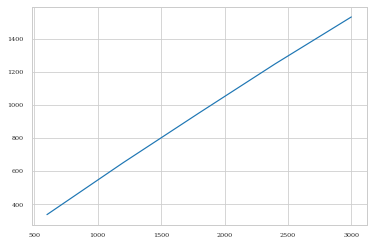

In [17]:
# calculate suitable conversion for interim sampling

x, y = [], []
for n in xs:
    try:
        trial_data = data[('interim-pfutility', n)]
    except:
        continue

    x.append(n)
    y.append(trial_data[:,2].mean())

f = lambda point, x=x, y=y: pwf(point, x, y)
print(f(2300))

sns.lineplot(x=x, y=y)

1198.9891599999999


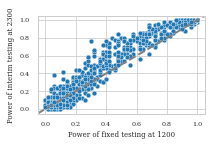

In [18]:
plt.figure(figsize=(3, 1.8))
fixed_data = data[('fixed', 1200)]
interim_data = data[('interim-pfutility', 2300)]
print(interim_data[:,2].mean())
sns.scatterplot(x=fixed_data[:,1], y=interim_data[:,1])

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='grey', linewidth=2, scalex=False, scaley=False)

plt.xlabel('Power of fixed testing at 1200')
plt.ylabel('Power of interim testing at 2300')
plt.savefig('X-X_interim_fixed.pdf', bbox_inches='tight')